In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Car_Price_Prediction1.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# categorical Data
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three 

In [6]:
# In dataset('CarName','cylindernumber','fuelsystem','enginetype') we convert some categorical data type to numeric data type with the use of OneHoteEncoder
from sklearn.preprocessing import OneHotEncoder
data_onhot = df[['CarName','cylindernumber','fuelsystem','enginetype']]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(data_onhot)
# create the names for the one-hot encoded categorical features
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data_onhot.columns) for cat in encoder.categories_[i]]
# put the features into a dataframe and join with the original
# numerical features
one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
#df = df.join(one_hot_features)

In [7]:
# In dataset('fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation') we convert some categorical data type to numeric data type with the use of OrdinalEncoder 

from sklearn.preprocessing import OrdinalEncoder
encod = OrdinalEncoder()
data_ordinal = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation']]
ordinal = encod.fit_transform(data_ordinal)
ordinal = encod.fit_transform(data_ordinal)
ordinal_funtion = pd.DataFrame(ordinal,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation'])
ordinal_funtion 

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation
0,1.0,0.0,1.0,0.0,2.0,0.0
1,1.0,0.0,1.0,0.0,2.0,0.0
2,1.0,0.0,1.0,2.0,2.0,0.0
3,1.0,0.0,0.0,3.0,1.0,0.0
4,1.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...
200,1.0,0.0,0.0,3.0,2.0,0.0
201,1.0,1.0,0.0,3.0,2.0,0.0
202,1.0,0.0,0.0,3.0,2.0,0.0
203,0.0,1.0,0.0,3.0,2.0,0.0


In [8]:
# remove categorical columns 
data = df.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','fuelsystem','enginetype'],axis=1)

In [9]:
data = data.join(one_hot_features)
data = data.join(ordinal_funtion)

In [10]:
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,0.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0


In [11]:
data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       ...
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation'],
      dtype='object', length=190)

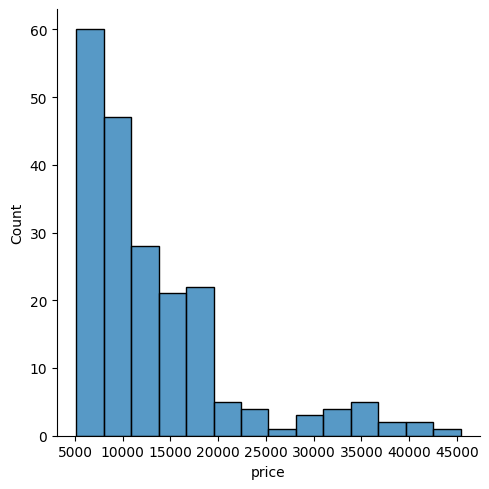

In [12]:
sns.displot(data,x='price')

In [13]:
x = data.drop('price',axis=1)
y = data['price']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)
print('x_train :',x_train.shape)
print('x_test:',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (143, 189)
x_test: (62, 189)
y_train : (143,)
y_test : (62,)


In [15]:
#
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
re = RandomForestRegressor()
# Fitting Data Into
re.fit(x_train,y_train)
re_pred = re.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(re_pred,y_test)

0.87217489567402